In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('EDA_clean_yield.csv')

In [6]:
df.head()

,component_name,cultivar_name,harvest_yield,humidity_rh,temperature_c,vapor_pressure_deficit,co2_ppm,fan_intensity,light_intensity,light_on_minutes,irrigation_minutes,grow_room
0,Butterhead,Fairly,20.886,53.305714,23.185000,1.326598,1145.666667,149.0,228.0,54.0,60.00,Grow_1
1,Red Mizuna,Red Baron Plus,10.901,70.210000,21.625000,0.769803,1095.250000,149.0,255.0,35.0,60.00,Grow_2
2,Butterhead,Fairly,24.180,69.643333,21.420000,0.774670,1197.250000,149.0,255.0,60.0,60.00,Grow_5
3,Curly Iceberg,Cristabel,24.388,66.731650,21.624242,0.861776,1218.201282,149.0,228.0,47.4,52.80,Grow_5
4,Baby Kale,Siberian,7.885,60.823846,22.630769,1.076288,1081.083333,149.0,228.0,36.0,29.75,Grow_4


In [7]:
df.shape

(15136, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15136 entries, 0 to 15135
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   component_name          15136 non-null  object 
 1   cultivar_name           15136 non-null  object 
 2   harvest_yield           15136 non-null  float64
 3   humidity_rh             15136 non-null  float64
 4   temperature_c           15136 non-null  float64
 5   vapor_pressure_deficit  15136 non-null  float64
 6   co2_ppm                 15136 non-null  float64
 7   fan_intensity           15136 non-null  float64
 8   light_intensity         15136 non-null  float64
 9   light_on_minutes        15136 non-null  float64
 10  irrigation_minutes      15136 non-null  float64
 11  grow_room               15136 non-null  object 
dtypes: float64(9), object(3)
memory usage: 1.4+ MB


In [9]:
df.describe()

,harvest_yield,humidity_rh,temperature_c,vapor_pressure_deficit,co2_ppm,fan_intensity,light_intensity,light_on_minutes,irrigation_minutes
count,15136.000000,15136.000000,15136.000000,15136.000000,15136.000000,15136.000000,15136.000000,15136.000000,15136.000000
mean,16.654515,64.270824,22.726052,0.990160,1107.859383,220.994359,234.341168,46.926389,53.690682
std,6.808639,4.585201,0.739245,0.140906,56.937204,36.586747,18.707635,10.184578,7.993175
min,1.253000,52.769591,20.818419,0.437103,996.000000,149.000000,117.000000,20.000000,29.750000
25%,10.353750,61.454763,22.243816,0.900322,1061.777778,207.333333,223.375000,42.571429,52.000000
50%,17.202000,64.762357,22.737074,0.981390,1101.977098,236.500000,228.000000,50.200000,56.666667
75%,21.945000,67.253448,23.196849,1.076334,1146.428523,245.764706,255.000000,54.181818,59.272727
max,53.294000,75.928245,26.858077,1.839470,1262.272727,254.000000,255.000000,60.000000,60.000000


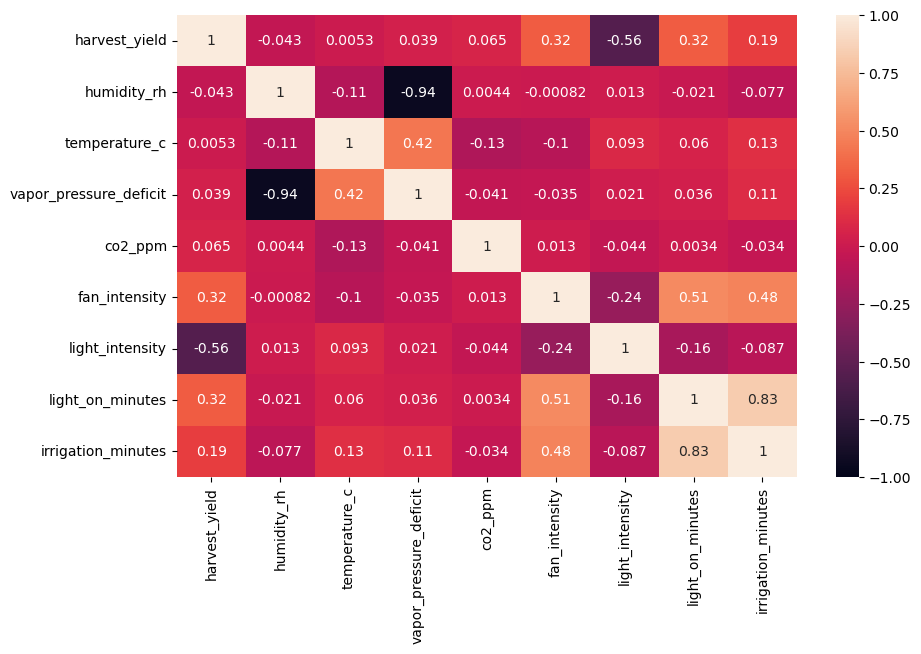

In [10]:
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1)
plt.show();

In [11]:
df.head().iloc[:,2:]

,harvest_yield,humidity_rh,temperature_c,vapor_pressure_deficit,co2_ppm,fan_intensity,light_intensity,light_on_minutes,irrigation_minutes,grow_room
0,20.886,53.305714,23.185000,1.326598,1145.666667,149.0,228.0,54.0,60.00,Grow_1
1,10.901,70.210000,21.625000,0.769803,1095.250000,149.0,255.0,35.0,60.00,Grow_2
2,24.180,69.643333,21.420000,0.774670,1197.250000,149.0,255.0,60.0,60.00,Grow_5
3,24.388,66.731650,21.624242,0.861776,1218.201282,149.0,228.0,47.4,52.80,Grow_5
4,7.885,60.823846,22.630769,1.076288,1081.083333,149.0,228.0,36.0,29.75,Grow_4


In [12]:
df = df[['component_name', 'cultivar_name', 'temperature_c', 'humidity_rh', 'vapor_pressure_deficit', 'co2_ppm', 'fan_intensity', 'light_intensity', 'light_on_minutes', 'irrigation_minutes', 'grow_room', 'harvest_yield']]

In [13]:
df.head()

,component_name,cultivar_name,temperature_c,humidity_rh,vapor_pressure_deficit,co2_ppm,fan_intensity,light_intensity,light_on_minutes,irrigation_minutes,grow_room,harvest_yield
0,Butterhead,Fairly,23.185000,53.305714,1.326598,1145.666667,149.0,228.0,54.0,60.00,Grow_1,20.886
1,Red Mizuna,Red Baron Plus,21.625000,70.210000,0.769803,1095.250000,149.0,255.0,35.0,60.00,Grow_2,10.901
2,Butterhead,Fairly,21.420000,69.643333,0.774670,1197.250000,149.0,255.0,60.0,60.00,Grow_5,24.180
3,Curly Iceberg,Cristabel,21.624242,66.731650,0.861776,1218.201282,149.0,228.0,47.4,52.80,Grow_5,24.388
4,Baby Kale,Siberian,22.630769,60.823846,1.076288,1081.083333,149.0,228.0,36.0,29.75,Grow_4,7.885


### Train | Test Split

In [14]:
X = df.drop('harvest_yield', axis=1)
y = df['harvest_yield']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train.shape

(12108, 11)

In [18]:
X_test.shape

(3028, 11)

## <span style='color:red'> XGBoosting Regressor </span> 

In [19]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (12108, 11)
Train target shape   :  (12108,)
Test features shape  :  (3028, 11)
Test target shape    :  (3028,)


### Modeling with Pipeline for XG Boost Regressor

In [20]:
#!pip install xgboost

In [21]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def train_val(model, X_train, y_train, X_test, y_test, name):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [22]:
import xgboost as xgb
xgb.__version__

'1.6.2'

In [23]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV

In [24]:
cat = X.select_dtypes("object").columns
cat

Index(['component_name', 'cultivar_name', 'grow_room'], dtype='object')

In [25]:
column_trans = make_column_transformer ((OneHotEncoder (handle_unknown='ignore', sparse=False), cat), 
                                        remainder=MinMaxScaler())

operations = [('OneHotEncoder', column_trans), ("XGB_model", XGBRegressor(random_state=42,
                                                                           max_depth=2,
                                                                           subsample=0.5,
                                                                           objective="reg:squarederror"))]

pipe_XGB_model = Pipeline(steps=operations)

pipe_XGB_model.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['component_name', 'cultivar_name', 'grow_room'], dtype='object'))])),
                ('XGB_model',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_bynode=1,
                              colsam...
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=2, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=100, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=42, reg_alpha=0,
                              reg_lambda=1, ...))])

In [26]:
train_val(pipe_XGB_model, X_train, y_train, X_test, y_test, 'XGB')

,XGB_train,XGB_test
R2,0.669968,0.651871
mae,2.905821,3.014736
mse,15.251032,16.336067
rmse,3.905257,4.041790


In [27]:
operations = [('OneHotEncoder', column_trans), ("XGB_model", XGBRegressor(random_state=42, 
                                                                           objective="reg:squarederror"))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =5)
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                              0.650210
test_neg_mean_absolute_error        -2.988690
test_neg_mean_squared_error        -16.161884
test_neg_root_mean_squared_error    -4.019875
dtype: float64

#### Gridsearch for XGBoost

In [28]:
param_grid = {"XGB_model__n_estimators":[300, 350],
              "XGB_model__max_depth":[3, 4], 
              "XGB_model__learning_rate": [0.1, 0.2],
              "XGB_model__subsample":[0.8, 1], 
              "XGB_model__colsample_bytree":[0.3, 0.5, 1]}

In [29]:
operations = [('OneHotEncoder', column_trans), ("XGB_model", XGBRegressor(random_state=42, 
                                                                           objective="reg:squarederror"))]

model = Pipeline(steps=operations)

XGB_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=3,
                          n_jobs = -1)

In [30]:
XGB_model.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['component_name', 'cultivar_name', 'grow_room'], dtype='object'))])),
                                       ('XGB_model',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=No...
                                                     n_estimators=100,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=42,
                                                     reg_alpha=None,
                                                     reg_lambda=None, ...))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bytree': [0.3, 0.5, 1],
                         'XGB_model__learning_rate': [0.1, 0.2],
                         'XGB_model__max_depth': [3, 4],
                         'XGB_model__n_estimators': [300, 350],
                         'XGB_model__subsample': [0.8, 1]},
             scoring='neg_root_mean_squared_error')

In [31]:
XGB_model.best_params_

{'XGB_model__colsample_bytree': 0.3,
 'XGB_model__learning_rate': 0.1,
 'XGB_model__max_depth': 4,
 'XGB_model__n_estimators': 300,
 'XGB_model__subsample': 1}

In [32]:
XGB_model.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['component_name', 'cultivar_name', 'grow_room'], dtype='object'))])),
                ('XGB_model',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_bynode=1,
                              colsam...
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.1, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=4, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=300, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=42, reg_alpha=0,
                              reg_lambda=1, ...))])

In [33]:
XGB_grid_model = train_val(XGB_model, X_train, y_train, X_test, y_test, 'XGB_grid')
XGB_grid_model

,XGB_grid_train,XGB_grid_test
R2,0.727567,0.668633
mae,2.640719,2.925373
mse,12.589339,15.549506
rmse,3.548146,3.943286


-----------------

### Deployment

In [34]:
import pickle
pickle.dump(XGB_model, open('XGB_model', 'wb'))

In [35]:
yield_model = pickle.load(open('XGB_model', 'rb'))

In [36]:
my_dict = {
    "component_name" : "Butterhead",
    "cultivar_name" : "Fairly",
    "temperature_c" : 22.7,
    "humidity_rh" : 68.8,
    "vapor_pressure_deficit" : 0.71,
    "co2_ppm" : 1145,
    "fan_intensity" : 148,
    "light_intensity" : 232,
    "light_on_minutes" : 45,
    "irrigation_minutes" : 60,
    "grow_room" : "Grow_3"
}

In [37]:
df2 = pd.DataFrame([my_dict])
df2

,component_name,cultivar_name,temperature_c,humidity_rh,vapor_pressure_deficit,co2_ppm,fan_intensity,light_intensity,light_on_minutes,irrigation_minutes,grow_room
0,Butterhead,Fairly,22.7,68.8,0.71,1145,148,232,45,60,Grow_3


In [38]:
# print("The estimate yield of component is {:.2f}. ".format(float(yield_model.predict(df2))))
prediction = yield_model.predict(df2)
print("The estimate yield of component is {:.2f}. ".format(float(prediction)))

The estimate yield of component is 22.24. 
